In [155]:
import pandas as pd
# Loading the clean data
df=pd.read_excel('cleaned_data_withHTML.xlsx')
#converting all columns to all caps
df['COURSE_CODE'] = df['COURSE_CODE'].str.upper()
df['MEETING_DAYS'] = df['MEETING_DAYS'].str.upper()
df['CLASS_TYPE']=df['CLASS_TYPE'].str.upper()
df['INSTRUCTOR']=df['INSTRUCTOR'].str.upper()
df['COURSE_NAME']=df['COURSE_NAME'].str.upper()
# Correcting the name of column
df = df.rename(columns={'SEATS_AVAILABALE': 'SEATS_AVAILABLE'})
df.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,CMPE 30,PROGRAMMING CONCEPT & METH,1,3,LEC,2,MW,1100-1150,H OZEMEK,2013,SPRING
1,CMPE 30,PROGRAMMING CONCEPT & METH,2,0,LAB,1,R,1730-2020,P KANG,2013,SPRING
2,CMPE 30,PROGRAMMING CONCEPT & METH,3,0,LAB,1,W,1730-2020,C ABBOUD,2013,SPRING
3,CMPE 46,COMPE I,1,3,SEM,1,TR,1030-1120,F LIN,2013,SPRING
4,CMPE 46,COMPE I,2,0,LAB,1,T,1330-1620,F LIN,2013,SPRING


In [156]:
#Total rows calculation
row_count = len(df)
print(row_count)

8901


# Final Data preprocessing

In [157]:
#Handling SECTION_NUMBER
print(df['SECTION_NUMBER'].isnull().sum())
df['SECTION_NUMBER'].fillna(0, inplace=True)
print(df['SECTION_NUMBER'].isnull().sum())

0
0


In [158]:
df['UNITS'].fillna(3, inplace=True)
print(df['INSTRUCTOR'].isnull().sum())

647


In [159]:
df.head(5)

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,CMPE 30,PROGRAMMING CONCEPT & METH,1,3,LEC,2,MW,1100-1150,H OZEMEK,2013,SPRING
1,CMPE 30,PROGRAMMING CONCEPT & METH,2,0,LAB,1,R,1730-2020,P KANG,2013,SPRING
2,CMPE 30,PROGRAMMING CONCEPT & METH,3,0,LAB,1,W,1730-2020,C ABBOUD,2013,SPRING
3,CMPE 46,COMPE I,1,3,SEM,1,TR,1030-1120,F LIN,2013,SPRING
4,CMPE 46,COMPE I,2,0,LAB,1,T,1330-1620,F LIN,2013,SPRING


In [160]:
#Finding Unique values in UNITS column
value_counts = df['UNITS'].value_counts()
# print the result
print(value_counts)

3    6780
0    1273
1     512
4     250
2      74
6       8
5       4
Name: UNITS, dtype: int64


In [161]:
value_counts = df['SEMESTER'].value_counts()
# print the result
print(value_counts)

FALL      4660
SPRING    4241
Name: SEMESTER, dtype: int64


In [162]:
df.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,CMPE 30,PROGRAMMING CONCEPT & METH,1,3,LEC,2,MW,1100-1150,H OZEMEK,2013,SPRING
1,CMPE 30,PROGRAMMING CONCEPT & METH,2,0,LAB,1,R,1730-2020,P KANG,2013,SPRING
2,CMPE 30,PROGRAMMING CONCEPT & METH,3,0,LAB,1,W,1730-2020,C ABBOUD,2013,SPRING
3,CMPE 46,COMPE I,1,3,SEM,1,TR,1030-1120,F LIN,2013,SPRING
4,CMPE 46,COMPE I,2,0,LAB,1,T,1330-1620,F LIN,2013,SPRING


In [163]:
df_fall = df[df['SEMESTER'] == 'FALL']
len(df_fall)

4660

In [164]:
df_spring = df[df['SEMESTER'] == 'SPRING']
len(df_spring)

4241

In [165]:
df_fall.to_excel('fall_data.xlsx')

In [166]:
df_spring.to_excel('spring_data.xlsx')

# Working on Outliers

In [167]:
# calculate the first quartile (Q1)
Q1 = df['SEATS_AVAILABLE'].quantile(0.25)

# calculate the third quartile (Q3)
Q3 = df['SEATS_AVAILABLE'].quantile(0.75)

# calculate the interquartile range (IQR)
IQR = Q3 - Q1

# define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# find the outliers
outliers = df[(df['SEATS_AVAILABLE'] < lower_bound) | (df['SEATS_AVAILABLE'] > upper_bound)]

# print the outliers
print(len(outliers))
print(max(outliers))

159
YEAR


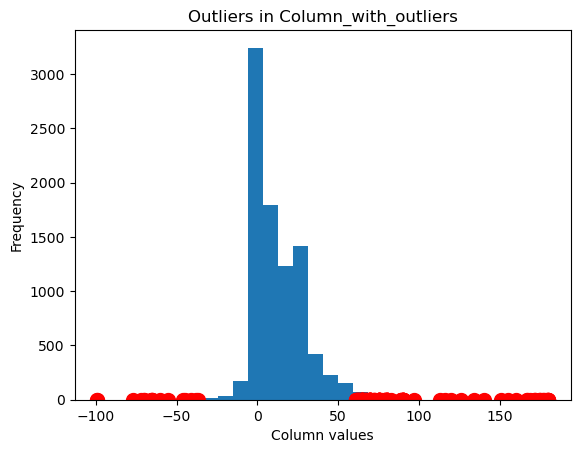

In [168]:
import matplotlib.pyplot as plt

# assume your dataframe column with outliers is named 'column_with_outliers'
outliers = df['SEATS_AVAILABLE'][(df['SEATS_AVAILABLE'] > upper_bound) | (df['SEATS_AVAILABLE'] < lower_bound)]

# plot a histogram of the column values
plt.hist(df['SEATS_AVAILABLE'], bins=30)

# plot red circles around the outliers
plt.plot(outliers, [0]*len(outliers), 'ro', markersize=10)

# add labels and title
plt.xlabel('Column values')
plt.ylabel('Frequency')
plt.title('Outliers in Column_with_outliers')

# show the plot
plt.show()

In [169]:
unique_values = df[(df['SEATS_AVAILABLE'] < 0) | (df['SEATS_AVAILABLE'] > 40)]['SEATS_AVAILABLE'].unique()
unique_values.sort()
unique_values

array([-99, -77, -72, -70, -66, -65, -60, -55, -46, -45, -41, -38, -37,
       -35, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21,
       -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  75,  76,  77,  79,  80,  83,  89,  90,  97, 113, 116, 120,
       126, 134, 140, 151, 155, 160, 167, 169, 171, 172, 174, 175, 177,
       178, 179, 180], dtype=int64)

In [170]:
df.loc[df['SEATS_AVAILABLE'] < 0, 'SEATS_AVAILABLE'] = 0

In [171]:
# df.loc[df['SEATS_AVAILABLE'] == 30, 'SEATS_AVAILABLE'] = 10
# df.loc[df['SEATS_AVAILABLE'] == 29, 'SEATS_AVAILABLE'] = 10
# df.loc[df['SEATS_AVAILABLE'] == 28, 'SEATS_AVAILABLE'] = 10
# df.loc[df['SEATS_AVAILABLE'] == 25, 'SEATS_AVAILABLE'] = 10
# df.loc[df['SEATS_AVAILABLE'] == 20, 'SEATS_AVAILABLE'] = 10

# Encoding

In [172]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [173]:
df_copy=df.copy()
df_copy.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,CMPE 30,PROGRAMMING CONCEPT & METH,1,3,LEC,2,MW,1100-1150,H OZEMEK,2013,SPRING
1,CMPE 30,PROGRAMMING CONCEPT & METH,2,0,LAB,1,R,1730-2020,P KANG,2013,SPRING
2,CMPE 30,PROGRAMMING CONCEPT & METH,3,0,LAB,1,W,1730-2020,C ABBOUD,2013,SPRING
3,CMPE 46,COMPE I,1,3,SEM,1,TR,1030-1120,F LIN,2013,SPRING
4,CMPE 46,COMPE I,2,0,LAB,1,T,1330-1620,F LIN,2013,SPRING


In [174]:
# Label encoding our data
df_copy['COURSE_CODE']=le.fit_transform(df_copy['COURSE_CODE'])
df_copy['COURSE_NAME']=le.fit_transform(df_copy['COURSE_NAME'])
df_copy['CLASS_TYPE']=le.fit_transform(df_copy['CLASS_TYPE'])
df_copy['MEETING_DAYS']=le.fit_transform(df_copy['MEETING_DAYS'])
df_copy['CLASS_HOURS']=le.fit_transform(df_copy['CLASS_HOURS'])
df_copy['SEMESTER']=le.fit_transform(df_copy['SEMESTER'])
df_copy['YEAR']=le.fit_transform(df_copy['YEAR'])
df_copy['INSTRUCTOR']=le.fit_transform(df_copy['INSTRUCTOR'])

In [175]:
df_copy.head()
df_copy['SEATS_AVAILABLE'].unique()

array([  2,   1,  10,   0,  26,  29,   4,  33,   5,  19,  25,   6,  11,
        22,  28,  17,   8,  18,  20,  32,  16,  30,   7,  13,  41,  21,
        12,   3,   9,  15,  37,  14,  76,  23,  24,  27,  36,  39,  59,
        31,  44,  45,  47,  42,  35,  50,  79,  51,  38,  49,  60,  40,
        48,  46,  54,  70,  90,  80,  34,  64,  67,  43,  65,  68,  72,
        61,  89,  55,  73,  57,  53,  52,  58, 177, 174,  56,  66, 172,
       175,  63, 126, 167,  83, 160, 169, 113, 151, 155,  75, 180, 120,
       140, 134, 178,  62,  71, 171,  77,  97, 179,  69, 116], dtype=int64)

In [176]:
# df_copy.loc[df_copy['SEATS_AVAILABLE'] > 40, 'SEATS_AVAILABLE'] = 10
# df_copy.loc[df_copy['SEATS_AVAILABLE'] < 0, 'SEATS_AVAILABLE'] = 0

# # Group the data by COURSE_CODE and calculate the max value of SEATS_AVAILABLE for each group
# max_seats = df_copy.groupby('COURSE_CODE')['SEATS_AVAILABLE'].max().reset_index()

# # Join the max_seats dataframe back to the original dataframe using COURSE_CODE as the key
# merged = df_copy.merge(max_seats, on='COURSE_CODE', suffixes=['', '_max'])

# # Divide the SEATS_AVAILABLE column by the max value for each group
# merged['SEATS_AVAILABLE'] = merged['SEATS_AVAILABLE'] / merged['SEATS_AVAILABLE_max']

# merged['SEATS_AVAILABLE_max'].unique()

In [177]:
# merged['SEATS_AVAILABLE'] = merged['SEATS_AVAILABLE'].fillna(0)
# merged['SEATS_AVAILABLE'].unique()

# Scaling

In [178]:
#Scaling
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()

In [179]:
df_scaled = scaler.fit_transform(df_copy)
df_scaled = pd.DataFrame(df_scaled, columns=df_copy.columns)

In [180]:
#Storing scaled values of seats available
seats_andscaled = pd.concat([df_scaled, df_copy['SEATS_AVAILABLE']], axis=1)
seats_andscaled.head()

#Renaming last column
# get the old column names
old_col_names = seats_andscaled.columns.tolist()

# rename the last column only
new_col_name = 'SEATS_UNSCALED'
old_col_names[-1] = new_col_name

# set the new column names
seats_andscaled.columns = old_col_names

seats_andscaled.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER,SEATS_UNSCALED
0,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.670989,-0.742716,-0.997454,-0.583817,-0.961011,1.048235,2
1,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.728158,-0.424287,0.729107,0.448771,-0.961011,1.048235,1
2,-0.542741,1.027485,-0.183189,-2.180871,-1.060161,-0.728158,1.486291,0.729107,-1.219256,-0.961011,1.048235,1
3,-0.531616,-0.869518,-0.377062,0.458054,0.958934,-0.728158,1.167861,-1.187186,-0.734316,-0.961011,1.048235,1
4,-0.531616,-0.869518,-0.280125,-2.180871,-1.060161,-0.728158,0.531002,-0.276472,-0.734316,-0.961011,1.048235,1


In [181]:
import numpy as np
# Group the data by COURSE_CODE and calculate the max value of SEATS_AVAILABLE for each group
max_seats = seats_andscaled.groupby('COURSE_CODE')['SEATS_UNSCALED'].max().reset_index()

# Join the max_seats dataframe back to the original dataframe using COURSE_CODE as the key
seats_prob = seats_andscaled.merge(max_seats, on='COURSE_CODE', suffixes=['', '_max'])

# Divide the SEATS_AVAILABLE column by the max value for each group
seats_prob['SEATS_UNSCALED'] = seats_prob['SEATS_UNSCALED'] / seats_prob['SEATS_UNSCALED_max']
seats_prob['SEATS_UNSCALED'] = seats_prob['SEATS_UNSCALED'].fillna(0)
# replace inf and -inf values with 0
seats_prob['SEATS_UNSCALED'] = seats_prob['SEATS_UNSCALED'].replace([np.inf, -np.inf], 0)

seats_prob.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER,SEATS_UNSCALED,SEATS_UNSCALED_max
0,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.670989,-0.742716,-0.997454,-0.583817,-0.961011,1.048235,0.333333,6
1,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.728158,-0.424287,0.729107,0.448771,-0.961011,1.048235,0.166667,6
2,-0.542741,1.027485,-0.183189,-2.180871,-1.060161,-0.728158,1.486291,0.729107,-1.219256,-0.961011,1.048235,0.166667,6
3,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.785327,-0.742716,-0.997454,-0.583817,-0.961011,-0.953984,0.000000,6
4,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.785327,-0.424287,0.729107,-1.219256,-0.961011,-0.953984,0.000000,6


In [219]:
seats_prob.to_excel('seats_prob.xlsx', index = False)

In [182]:
# create an empty dictionary
course_dict = {}

# iterate through the dataframe to match {course code:{Seats available scaled: Seats unscaled average}
for index, row in seats_prob.iterrows():
    # get the course code, seats available, and seats unscaled values
    course_code = row['COURSE_CODE']
    seats_available = row['SEATS_AVAILABLE']
    seats_unscaled = row['SEATS_UNSCALED']
    
    # if the course code doesn't exist in the outer dictionary, create a new inner dictionary
    if course_code not in course_dict:
        course_dict[course_code] = {}
    
    # add the seats available and seats unscaled values to the inner dictionary
    course_dict[course_code][seats_available] = seats_unscaled
    

print(course_dict)


{-0.542741155818184: {-0.6709889664324392: 0.3333333333333333, -0.728158228327865: 0.16666666666666666, -0.785327490223291: 0.0, -0.6138197045370133: 0.5, -0.5566504426415875: 0.6666666666666666, -0.4423119188507357: 1.0}, -0.5316157661242393: {-0.728158228327865: 1.0}, -0.5260530712772671: {-0.21363487126903216: 0.4, -0.785327490223291: 0.0, 0.6439040571623561: 1.0, 0.015042176312671369: 0.56, -0.728158228327865: 0.04, 0.18654996199894902: 0.68, -0.27080413316445806: 0.36, -0.32797339505988393: 0.32, -0.6709889664324392: 0.08, -0.6138197045370133: 0.12}, -1.5551516179671472: {0.7010733190577819: 0.52, 0.8725811047440596: 0.58, 0.07221143820809725: 0.3, 0.35805774768522663: 0.4, -0.04212708558275451: 0.26, -0.09929634747818039: 0.24, -0.3851426569553098: 0.14, -0.6709889664324392: 0.04, -0.728158228327865: 0.02, 0.015042176312671369: 0.28, -0.32797339505988393: 0.16, -0.49948118074616155: 0.1, -0.21363487126903216: 0.2, -0.15646560937360626: 0.22, 0.6439040571623561: 0.5, 0.58673479526

In [183]:
# convert the dataframe to a dictionary
seats_dict = dict(zip(seats_andscaled['SEATS_AVAILABLE'], seats_andscaled['SEATS_UNSCALED']))

# print the resulting dictionary
print(seats_dict)

{-0.6709889664324392: 2, -0.728158228327865: 1, -0.21363487126903216: 10, -0.785327490223291: 0, 0.7010733190577819: 26, 0.8725811047440596: 29, -0.5566504426415875: 4, 1.1012581523257632: 33, -0.49948118074616155: 5, 0.30088848578980076: 19, 0.6439040571623561: 25, -0.4423119188507357: 6, -0.15646560937360626: 11, 0.47239627147607843: 22, 0.8154118428486337: 28, 0.18654996199894902: 17, -0.32797339505988393: 8, 0.2437192238943749: 18, 0.35805774768522663: 20, 1.0440888904303371: 32, 0.12938070010352312: 16, 0.9297503666394855: 30, -0.3851426569553098: 7, -0.04212708558275451: 13, 1.5586122474891702: 41, 0.41522700958065256: 21, -0.09929634747818039: 12, -0.6138197045370133: 3, -0.27080413316445806: 9, 0.07221143820809725: 15, 1.3299351999074667: 37, 0.015042176312671369: 14, 3.5595364138290764: 76, 0.5295655333715042: 23, 0.5867347952669302: 24, 0.7582425809532078: 27, 1.2727659380120409: 36, 1.4442737236983183: 39, 2.587658961606836: 59, 0.9869196285349113: 31, 1.7301200331754478: 44

# Working on Outliers

In [184]:
# # calculate the first quartile (Q1)
# Q1 = y['SEATS_AVAILABLE'].quantile(0.25)

# # calculate the third quartile (Q3)
# Q3 = y['SEATS_AVAILABLE'].quantile(0.75)

# # calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # find the outliers
# outliers = y[(y['SEATS_AVAILABLE'] < lower_bound) | (y['SEATS_AVAILABLE'] > upper_bound)]

# # print the outliers
# print(len(outliers))
# print(max(outliers))


In [185]:
# import matplotlib.pyplot as plt

# # assume your dataframe column with outliers is named 'column_with_outliers'
# outliers = y['SEATS_AVAILABLE'][(y['SEATS_AVAILABLE'] > upper_bound) | (y['SEATS_AVAILABLE'] < lower_bound)]

# # plot a histogram of the column values
# plt.hist(y['SEATS_AVAILABLE'], bins=30)

# # plot red circles around the outliers
# plt.plot(outliers, [0]*len(outliers), 'ro', markersize=10)

# # add labels and title
# plt.xlabel('Column values')
# plt.ylabel('Frequency')
# plt.title('Outliers in Column_with_outliers')

# # show the plot
# plt.show()


In [186]:
# unique_values = y[(y['SEATS_AVAILABLE'] < 0) | (y['SEATS_AVAILABLE'] > 40)]['SEATS_AVAILABLE'].unique()
# unique_values.sort()
# unique_values

In [187]:
# y.loc[y['SEATS_AVAILABLE'] < 0, 'SEATS_AVAILABLE'] = 0

In [188]:
# y['SEATS_AVAILABLE'].value_counts().head(10)

In [189]:
# y.loc[y['SEATS_AVAILABLE'] == 30, 'SEATS_AVAILABLE'] = 10
# y.loc[y['SEATS_AVAILABLE'] == 29, 'SEATS_AVAILABLE'] = 10
# y.loc[y['SEATS_AVAILABLE'] == 28, 'SEATS_AVAILABLE'] = 10
# y.loc[y['SEATS_AVAILABLE'] == 25, 'SEATS_AVAILABLE'] = 10
# y.loc[y['SEATS_AVAILABLE'] == 20, 'SEATS_AVAILABLE'] = 10

In [190]:
#y['SEATS_AVAILABLE'].value_counts().head(20)

In [191]:
X = df_scaled.drop('SEATS_AVAILABLE', axis=1) 

In [192]:
y= pd.DataFrame({'SEATS_AVAILABLE': df_scaled['SEATS_AVAILABLE'].values})
temp=pd.DataFrame({'SEATS_AVAILABLE':y['SEATS_AVAILABLE'].values})
temp.head()

,SEATS_AVAILABLE
0,-0.670989
1,-0.728158
2,-0.728158
3,-0.728158
4,-0.728158


In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
X.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.742716,-0.997454,-0.583817,-0.961011,1.048235
1,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.424287,0.729107,0.448771,-0.961011,1.048235
2,-0.542741,1.027485,-0.183189,-2.180871,-1.060161,1.486291,0.729107,-1.219256,-0.961011,1.048235
3,-0.531616,-0.869518,-0.377062,0.458054,0.958934,1.167861,-1.187186,-0.734316,-0.961011,1.048235
4,-0.531616,-0.869518,-0.280125,-2.180871,-1.060161,0.531002,-0.276472,-0.734316,-0.961011,1.048235


In [195]:
#CALCULATING AVERAGE DATAFRAME

# group the data by COURSE_CODE and calculate the mean of other columns
grouped_data = X.groupby('COURSE_CODE').mean()

# drop duplicates of COURSE_CODE
grouped_data = grouped_data.drop_duplicates()

# create a new dataframe with unique COURSE_CODE and the calculated means
avg_df = pd.DataFrame({'COURSE_CODE': grouped_data.index,
                       'COURSE_NAME': grouped_data['COURSE_NAME'],
                       'SECTION_NUMBER': grouped_data['SECTION_NUMBER'],
                       'UNITS': grouped_data['UNITS'],
                       'CLASS_TYPE': grouped_data['CLASS_TYPE'],
                       'MEETING_DAYS': grouped_data['MEETING_DAYS'],
                       'CLASS_HOURS': grouped_data['CLASS_HOURS'],
                       'INSTRUCTOR': grouped_data['INSTRUCTOR'],
                       'YEAR': grouped_data['YEAR'],
                       'SEMESTER': grouped_data['SEMESTER']})

avg_df = avg_df.reset_index(drop=True)
avg_df.head()


,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,-1.582965,-0.417850,-0.344750,0.458054,-0.429194,-0.105857,0.140938,0.699602,-1.646708,-0.286578
1,-1.577402,1.025185,-0.163802,-1.269242,-0.842190,0.206783,-0.080531,-0.596587,-0.100774,0.283752
2,-1.571840,-0.874034,-0.263969,-1.301229,-0.387129,-0.105857,-0.072511,-1.300776,-1.548751,0.047126
3,-1.566277,0.789177,-0.243197,-1.364061,-0.864862,0.402114,-0.214584,-0.593970,-0.226337,0.142469
4,-1.560714,0.869401,-0.328593,-1.301229,0.958934,0.743289,0.817649,0.568612,-1.646708,-0.286578


In [196]:
print(grouped_data)

             COURSE_NAME  SECTION_NUMBER     UNITS  CLASS_TYPE  MEETING_DAYS  \
COURSE_CODE                                                                    
-1.582965      -0.417850       -0.344750  0.458054   -0.429194     -0.105857   
-1.577402       1.025185       -0.163802 -1.269242   -0.842190      0.206783   
-1.571840      -0.874034       -0.263969 -1.301229   -0.387129     -0.105857   
-1.566277       0.789177       -0.243197 -1.364061   -0.864862      0.402114   
-1.560714       0.869401       -0.328593 -1.301229    0.958934      0.743289   
...                  ...             ...       ...         ...           ...   
 1.671211       0.047367       -0.344750 -0.128374    1.589901      0.849432   
 1.676774       1.150846       -0.358886  0.458054    0.927386      0.152867   
 1.682337       0.444834       -0.377062  0.458054   -0.429194      0.849432   
 1.687899       1.353274       -0.343345 -0.842286   -1.010781     -0.022788   
 1.693462       1.233703       -0.285665

In [197]:
# filtered_rows = grouped_data[grouped_data['COURSE_CODE']==0.16928378459427354]
# print(filtered_rows)

In [198]:
new_df = pd.DataFrame({'COURSE_CODE': avg_df['COURSE_CODE']})
avg_df.to_excel('avg_df1.xlsx')
new_df.head()

new_df.to_excel('new_df1.xlsx', index = False)

In [199]:
DICT_X = pd.concat([X, df['COURSE_CODE']], axis=1)
DICT_X.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER,COURSE_CODE
0,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.742716,-0.997454,-0.583817,-0.961011,1.048235,CMPE 30
1,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.424287,0.729107,0.448771,-0.961011,1.048235,CMPE 30
2,-0.542741,1.027485,-0.183189,-2.180871,-1.060161,1.486291,0.729107,-1.219256,-0.961011,1.048235,CMPE 30
3,-0.531616,-0.869518,-0.377062,0.458054,0.958934,1.167861,-1.187186,-0.734316,-0.961011,1.048235,CMPE 46
4,-0.531616,-0.869518,-0.280125,-2.180871,-1.060161,0.531002,-0.276472,-0.734316,-0.961011,1.048235,CMPE 46


In [200]:
#Renaming last column
# get the old column names
old_col_names = DICT_X.columns.tolist()

# rename the last column only
new_col_name = 'COURSE_TEXT'
old_col_names[-1] = new_col_name

# set the new column names
DICT_X.columns = old_col_names

DICT_X.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER,COURSE_TEXT
0,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.742716,-0.997454,-0.583817,-0.961011,1.048235,CMPE 30
1,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.424287,0.729107,0.448771,-0.961011,1.048235,CMPE 30
2,-0.542741,1.027485,-0.183189,-2.180871,-1.060161,1.486291,0.729107,-1.219256,-0.961011,1.048235,CMPE 30
3,-0.531616,-0.869518,-0.377062,0.458054,0.958934,1.167861,-1.187186,-0.734316,-0.961011,1.048235,CMPE 46
4,-0.531616,-0.869518,-0.280125,-2.180871,-1.060161,0.531002,-0.276472,-0.734316,-0.961011,1.048235,CMPE 46


In [218]:
# Drop all but first and last columns
DICT_X = DICT_X.iloc[:, [0, -1]]

# Save the DataFrame to Excel
DICT_X.to_excel('course_codes.xlsx', index=False)

In [201]:
# convert the dataframe to a dictionary
result_dict = dict(zip(DICT_X['COURSE_TEXT'], DICT_X['COURSE_CODE']))

# print the resulting dictionary
print(result_dict)

{'CMPE 30': -0.542741155818184, 'CMPE 46': -0.5316157661242393, 'CMPE 50': -0.5260530712772671, 'CMPE 102': -1.5551516179671472, 'CMPE 110': -1.5440262282732025, 'CMPE 120': -1.5329008385792577, 'CMPE 124': -1.5217754488853132, 'CMPE 125': -1.5106500591913685, 'CMPE 126': -1.4995246694974238, 'CMPE 127': -1.488399279803479, 'CMPE 130': -1.4772738901095346, 'CMPE 131': -1.4661485004155899, 'CMPE 133': -1.4438977210277006, 'CMPE 137': -1.4216469416398112, 'CMPE 138': -1.4105215519458667, 'CMPE 140': -1.3938334674049497, 'CMPE 142': -1.382708077711005, 'CMPE 146': -1.3715826880170603, 'CMPE 148': -1.3604572983231158, 'CMPE 152': -1.3382065189352264, 'CMPE 180': -1.293704960159448, 'CMPE 187': -1.2213899271488076, 'CMPE 195A': -1.1935764529139459, 'CMPE 197': -1.1379495044442227, 'CMPE 198': -1.1323868095972505, 'CMPE 200': -1.1212614199033057, 'CMPE 202': -1.110136030209361, 'CMPE 203': -1.0990106405154165, 'CMPE 206': -1.093447945668444, 'CMPE 207': -1.0823225559744996, 'CMPE 208': -1.07

In [202]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

C:\Users\Checkout\AppData\Local\Temp\ipykernel_26860\3300557753.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [203]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.298816)
2. feature 8 (0.170683)
3. feature 7 (0.138153)
4. feature 6 (0.085277)
5. feature 1 (0.083633)
6. feature 2 (0.074497)
7. feature 3 (0.054169)
8. feature 4 (0.048271)
9. feature 5 (0.024803)
10. feature 9 (0.021699)


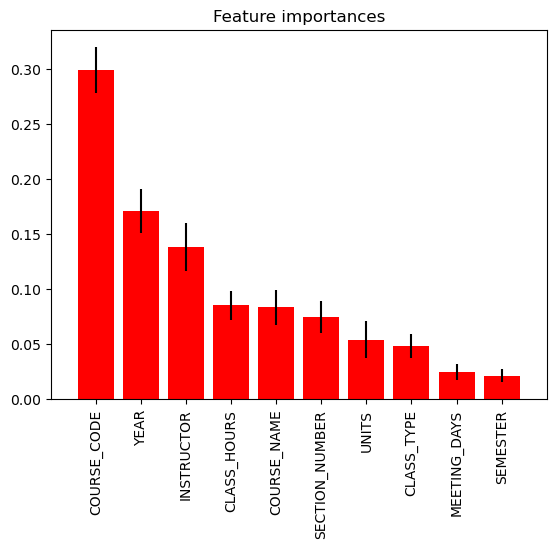

In [204]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Linear Models

In [205]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [206]:
#Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_score = linreg.score(X_test, y_test)
linear_y_pred = linreg.predict(X_test)
linearRmse = np.sqrt(mean_squared_error(y_test, linear_y_pred))
linearMae = mean_absolute_error(y_test, linear_y_pred)
print(f'Linear Regression score: {linreg_score:.2f}')
print(f'Linear Regression RMSE: {linearRmse:.2f}')
print(f'Linear Regression MAE: {linearMae:.2f}')

Linear Regression score: 0.08
Linear Regression RMSE: 0.98
Linear Regression MAE: 0.70


In [207]:
#RidgeRegression
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)
ridge_y_pred=ridge.predict(X_test)
ridgeRmse=np.sqrt(mean_squared_error(y_test, ridge_y_pred))
ridgeMae = mean_absolute_error(y_test, ridge_y_pred)
print(f'Ridge Regression score: {ridge_score:.2f}')
print(f'Ridge Regression RMSE: {ridgeRmse:.2f}')
print(f'Ridge Regression MAE: {ridgeMae:.2f}')

Ridge Regression score: 0.08
Ridge Regression RMSE: 0.98
Ridge Regression MAE: 0.70


In [208]:
#Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)
print(f'Lasso Regression score: {lasso_score:.2f}')
lasso_y_pred=lasso.predict(X_test)
lassoRmse=np.sqrt(mean_squared_error(y_test, lasso_y_pred))
lassoMae = mean_absolute_error(y_test, lasso_y_pred)
print(f'Lasso Regression RMSE: {lassoRmse:.2f}')
print(f'Lasso Regression MAE: {lassoMae:.2f}')

Lasso Regression score: 0.04
Lasso Regression RMSE: 1.00
Lasso Regression MAE: 0.72


# Nonlinear regression models

In [209]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [210]:
#SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)
svr_score = svr_reg.score(X_test, y_test)
print(f'SVR score: {svr_score:.2f}')
y_pred_SVR=svr_reg.predict(X_test)
mse_SVR=mean_squared_error(y_test,y_pred_SVR)
#print(f'SVR MSE:{mse_SVR}')
SVR_y_pred=svr_reg.predict(X_test)
SVRRmse=np.sqrt(mean_squared_error(y_test, SVR_y_pred))
SVRMae = mean_absolute_error(y_test, SVR_y_pred)
print(f'SVR Regression RMSE: {SVRRmse:.2f}')
print(f'SVR Regression MAE: {SVRMae:.2f}')

C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR score: 0.33
SVR Regression RMSE: 0.83
SVR Regression MAE: 0.49


In [211]:
#KNN
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)
knn_score=knn.score(X_test, y_test)
print(f'KNN score: {knn_score:.2f}')
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute error:", mae)

KNN score: 0.30
Mean squared error: 0.7297790405726302
Mean Absolute error: 0.5523975918204348


In [212]:
# RANDOM FOREST MODEL

In [213]:
rf_reg = RandomForestRegressor(n_estimators=300, random_state=62, min_samples_split=2, max_features=6,min_samples_leaf=1)
rf_reg.fit(X_train, y_train)
rf_score = rf_reg.score(X_test, y_test)
print(f'Random Forest score: {rf_score:.2f}')
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Square error:", mse)
print("Mean Absolute error:", mae)

C:\Users\Checkout\AppData\Local\Temp\ipykernel_26860\1543396057.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Random Forest score: 0.71
Mean Square error: 0.3049077999201627
Mean Absolute error: 0.34400134792101583


In [214]:
# Final Random Forest Regression Model after tuning

# BEST MODEL

In [215]:
# remove the 'CLASS_HOURS' column from the feature matrix
X_train_new = X_train.drop('CLASS_HOURS', axis=1)
X_test_new = X_test.drop('CLASS_HOURS', axis=1)

# create the Random Forest Regression model using the new feature matrix
rf_reg_new = RandomForestRegressor(n_estimators=500, random_state=62, min_samples_split=2, max_features=6, min_samples_leaf=1)
rf_reg_new.fit(X_train_new, y_train)

# evaluate the performance of the model on the test set
rf_score_new = rf_reg_new.score(X_test_new, y_test)
print(f'Random Forest score without CLASS_HOURS column: {rf_score_new:.2f}')

y_pred_new = rf_reg_new.predict(X_test_new)
mse_new = mean_squared_error(y_test, y_pred_new)
mae_new = mean_absolute_error(y_test, y_pred_new)
print("Mean Square error without CLASS_HOURS column:", mse_new)
print("Mean Absolute error without CLASS_HOURS column:", mae_new)


C:\Users\Checkout\AppData\Local\Temp\ipykernel_26860\103434250.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_new.fit(X_train_new, y_train)


Random Forest score without CLASS_HOURS column: 0.73
Mean Square error without CLASS_HOURS column: 0.2833029355622943
Mean Absolute error without CLASS_HOURS column: 0.33127349931198824


In [216]:
import joblib

# Save the trained model to a file
filename = 'rf_reg_new1.pkl'
joblib.dump(rf_reg_new, filename)

['rf_reg_new1.pkl']